# 6.4 正则化
解决**过拟合**问题

## 6.4.1 过拟合 - 6.4.2 权值衰减

epoch:0, train acc:0.1, test acc:0.1051
epoch:1, train acc:0.10333333333333333, test acc:0.1032
epoch:2, train acc:0.10666666666666667, test acc:0.106
epoch:3, train acc:0.12666666666666668, test acc:0.1139
epoch:4, train acc:0.13666666666666666, test acc:0.1241
epoch:5, train acc:0.15, test acc:0.1384
epoch:6, train acc:0.16666666666666666, test acc:0.1497
epoch:7, train acc:0.17, test acc:0.1603
epoch:8, train acc:0.18666666666666668, test acc:0.1749
epoch:9, train acc:0.21666666666666667, test acc:0.1896
epoch:10, train acc:0.23666666666666666, test acc:0.2002
epoch:11, train acc:0.26666666666666666, test acc:0.2134
epoch:12, train acc:0.2966666666666667, test acc:0.2262
epoch:13, train acc:0.32, test acc:0.2401
epoch:14, train acc:0.35333333333333333, test acc:0.2601
epoch:15, train acc:0.37, test acc:0.2715
epoch:16, train acc:0.38333333333333336, test acc:0.2792
epoch:17, train acc:0.39, test acc:0.3007
epoch:18, train acc:0.4066666666666667, test acc:0.3151
epoch:19, train acc:0

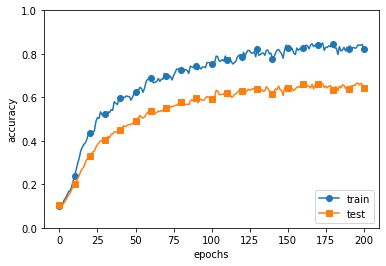

In [1]:
# ch06/overfit_weight_decay.py
# commom/multi_layer_net.py

import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.4.3 Dropout

In [2]:
class Dropout:

    def __init__(self, dropout__ratio=0.5):
        self.dropout_ratio = dropout__ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

MNIST数据集验证

train loss:2.296614939304566
=== epoch:1, train acc:0.08333333333333333, test acc:0.1014 ===
train loss:2.314665818371766
train loss:2.300894876868434
train loss:2.2815052318775866
=== epoch:2, train acc:0.09, test acc:0.1043 ===
train loss:2.2981280356664477
train loss:2.296284064422597
train loss:2.2932492735710115
=== epoch:3, train acc:0.09333333333333334, test acc:0.1073 ===
train loss:2.289668896041547
train loss:2.3034817801431977
train loss:2.297931325688634
=== epoch:4, train acc:0.10666666666666667, test acc:0.1107 ===
train loss:2.282380393851128
train loss:2.279175058283848
train loss:2.310572801888299
=== epoch:5, train acc:0.10666666666666667, test acc:0.1134 ===
train loss:2.2750310396757714
train loss:2.298880196781825
train loss:2.284005721781578
=== epoch:6, train acc:0.10666666666666667, test acc:0.1165 ===
train loss:2.279818623503761
train loss:2.2994991012075388
train loss:2.272919266104081
=== epoch:7, train acc:0.10333333333333333, test acc:0.1165 ===
train loss

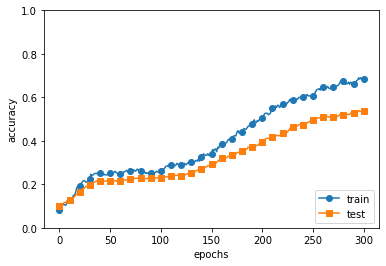

In [3]:
# ch06/overfit_dropout.py
# commom/trainer.py

import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()